In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as DataSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

sb.set(style='whitegrid', color_codes=True) # for theming the seaborn - for high end matplot figures

In [2]:
data = pd.read_csv("./Admission_Predict.csv")
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
data.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
data.drop(labels='Serial No.', axis=1, inplace=True) # no need of serial no.

In [5]:
data.corr() #gives the correlated values

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

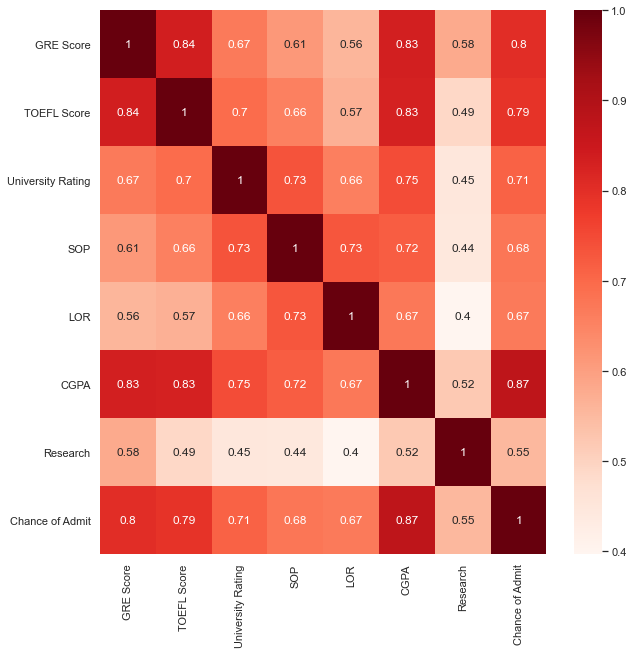

In [6]:
mp.subplots(figsize=(10,10))# set fig size
sb.heatmap(data.corr(),annot=True, cmap='Reds')

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

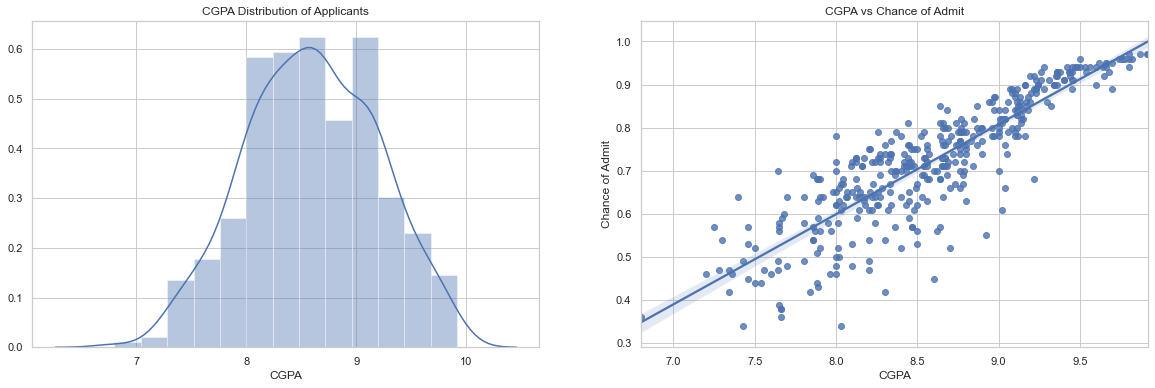

In [7]:
mp.figure(figsize=(20,6))
mp.subplot(1,2,1) #create 1 row 2 col and in the 1st index create ...
sb.distplot(data['CGPA'])
mp.title('CGPA Distribution of Applicants')

mp.subplot(1,2,2)
sb.regplot(data['CGPA'], data['Chance of Admit']) #graph wid line
mp.title('CGPA vs Chance of Admit')

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

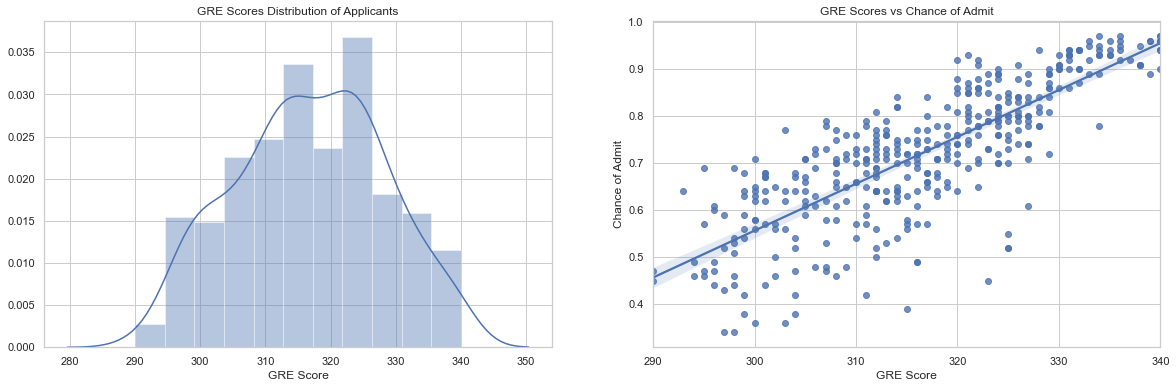

In [8]:
mp.figure(figsize=(20,6))
mp.subplot(1,2,1)
sb.distplot(data['GRE Score'])
mp.title('GRE Scores Distribution of Applicants')

mp.subplot(1,2,2)
sb.regplot(data['GRE Score'], data['Chance of Admit'])
mp.title('GRE Scores vs Chance of Admit')

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

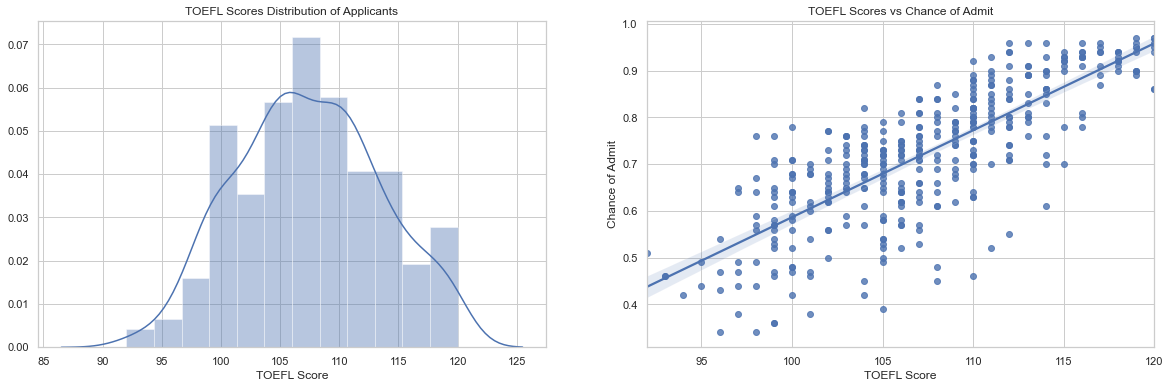

In [9]:
mp.figure(figsize=(20,6))
mp.subplot(1,2,1)
sb.distplot(data['TOEFL Score'])
mp.title('TOEFL Scores Distribution of Applicants')

mp.subplot(1,2,2)
sb.regplot(data['TOEFL Score'], data['Chance of Admit'])
mp.title('TOEFL Scores vs Chance of Admit')

[Text(0, 0, 'No Research Experience'), Text(1, 0, 'Has Research Experience')]

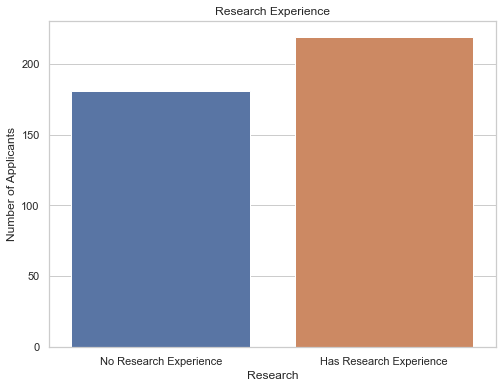

In [10]:
_,axis=mp.subplots(figsize=(8,6))
sb.countplot(data['Research'])
mp.title('Research Experience')
mp.ylabel('Number of Applicants')
axis.set_xticklabels(['No Research Experience', 'Has Research Experience'])

Text(0, 0.5, 'Number of Applicants')

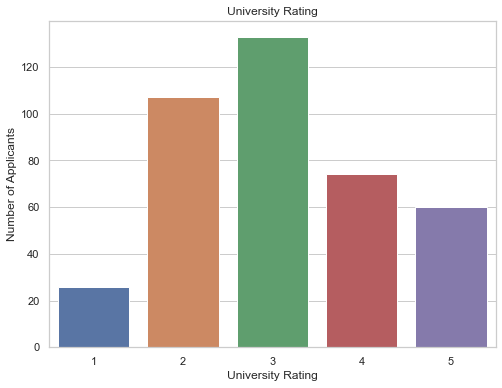

In [11]:
mp.subplots(figsize=(8,6))
sb.countplot(data['University Rating'])
mp.title('University Rating')
mp.ylabel('Number of Applicants')

In [12]:
targets = data['Chance of Admit']
features = data.drop(columns = {'Chance of Admit'})

In [13]:
Normaliser = StandardScaler()
X=Normaliser.fit_transform(features)

In [14]:
X_train, X_test, y_train, y_test = DataSplit(X, targets, test_size=0.2, random_state=42)

In [15]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
LinearRegAccuracy = (LinearReg.score(X_test, y_test))*100
LinearRegAccuracy

82.12082591486991

In [16]:
DecisionTreeReg = DecisionTreeRegressor(random_state=0, max_depth=6)
DecisionTreeReg.fit(X_train, y_train)
DecisionTreeRegAccuracy = (DecisionTreeReg.score(X_test, y_test))*100
DecisionTreeRegAccuracy

76.77705178069635

In [17]:
RandomForestReg = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
RandomForestReg.fit(X_train, y_train)
RandomForestRegAccuracy = (RandomForestReg.score(X_test, y_test))*100
RandomForestRegAccuracy

81.87998966414467

Text(0, 0.5, 'Accuracy')

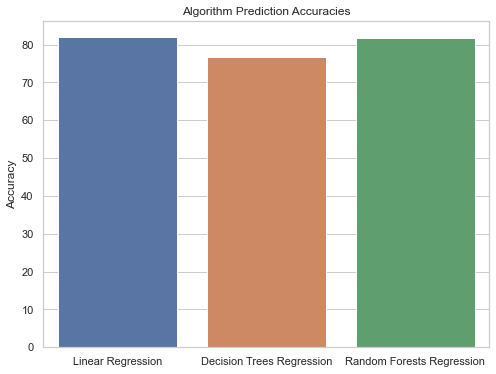

In [18]:
Algorithms = ['Linear Regression', 'Decision Trees Regression', 'Random Forests Regression']
Accuracies = [LinearRegAccuracy,DecisionTreeRegAccuracy,RandomForestRegAccuracy]

mp.subplots(figsize=(8,6))
sb.barplot(Algorithms,Accuracies)
mp.title('Algorithm Prediction Accuracies')
mp.ylabel('Accuracy')

In [19]:
dump(Normaliser,'normalise.bin')

['normalise.bin']

In [20]:
dump(LinearReg,'linearreg.bin')

['linearreg.bin']